# **Importing necessary libraries with unique aliases**

In [65]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.metrics import accuracy_score as acc_score
from sklearn.preprocessing import StandardScaler as Scaler
from sklearn.impute import SimpleImputer



# **Load the credit card transactions dataset**

In [66]:
data = pd.read_csv("/content/sample_data/creditcard.csv")

# **Displaying dataset overview**

In [67]:

print(data.head(10))
print(data.describe())
print(data.isnull().sum())
print(data['Class'].value_counts())



   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
5   2.0 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728  0.476201   
6   4.0  1.229658  0.141004  0.045371  1.202613  0.191881  0.272708 -0.005159   
7   7.0 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118  1.120631   
8   7.0 -0.894286  0.286157 -0.113192 -0.271526  2.669599  3.721818  0.370145   
9   9.0 -0.338262  1.119593  1.044367 -0.222187  0.499361 -0.246761  0.651583   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -

# **Separate transactions by class**

In [68]:

legit_transactions = data[data.Class == 0]
fraud_transactions = data[data.Class == 1]

print(f"Legitimate transactions: {legit_transactions.shape}")
print(f"Fraudulent transactions: {fraud_transactions.shape}")



Legitimate transactions: (284315, 31)
Fraudulent transactions: (492, 31)


# **Displaying statistical summary for transaction amounts**

In [ ]:

print("Legitimate transactions amount statistics:")
print(legit_transactions.Amount.describe())

print("Fraudulent transactions amount statistics:")
print(fraud_transactions.Amount.describe())



# **Visualize the distribution of transaction amounts**

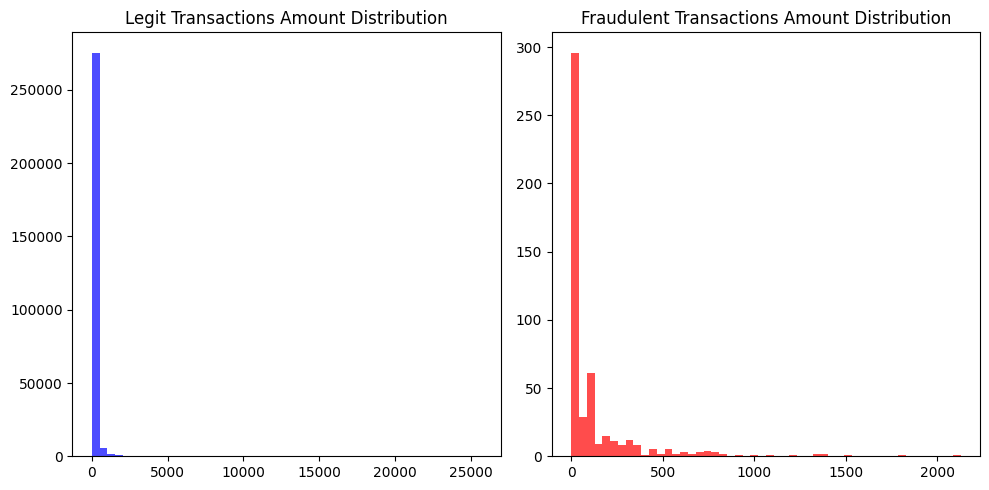

In [69]:

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(legit_transactions.Amount, bins=50, color='blue', alpha=0.7)
plt.title('Legit Transactions Amount Distribution')

plt.subplot(1, 2, 2)
plt.hist(fraud_transactions.Amount, bins=50, color='red', alpha=0.7)
plt.title('Fraudulent Transactions Amount Distribution')

plt.tight_layout()
plt.show()



# **Impute missing values in features and target**

In [70]:

imputer_X = SimpleImputer(strategy='mean')
X_imputed = imputer_X.fit_transform(data.drop(columns=['Class', 'Time'], axis=1))

imputer_y = SimpleImputer(strategy='most_frequent')
y_imputed = imputer_y.fit_transform(data[['Class']]).ravel()



# **Prepare the data**

In [71]:

scaler = Scaler()
X_scaled = scaler.fit_transform(X_imputed)

X_train, X_test, y_train, y_test = tts(X_scaled, y_imputed, test_size=0.3, random_state=42)



# **Train the logistic regression model**

In [72]:

model = LogReg(max_iter=1000)
model.fit(X_train, y_train)



LogisticRegression(max_iter=1000)

# **Predicting on the test set**

In [73]:

y_pred = model.predict(X_test)



# **Evaluate the model**

In [74]:

accuracy = acc_score(y_test, y_pred)
print(f"Model accuracy: {accuracy * 100:.2f}%")



Model accuracy: 99.93%


# **Confusion Matrix**

In [75]:

from sklearn.metrics import confusion_matrix
import seaborn as sns



# **Generate confusion matrix**

In [ ]:

conf_matrix = confusion_matrix(y_test, y_pred)



# **Plotting confusion matrix**

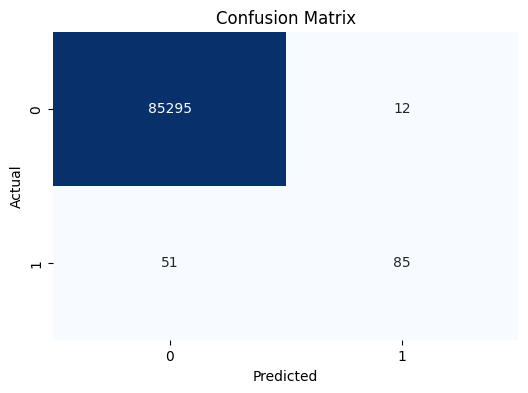

In [76]:

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()